# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측

- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

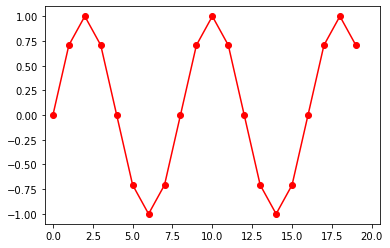

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

## 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환


### (대각선 위의 성분들이 같은 정사각 행렬)


In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [4]:
S

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00, -7.07106781e-01, -2.44929360e-16,
         7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01,  3.67394040e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  3.6

In [5]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [6]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [7]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

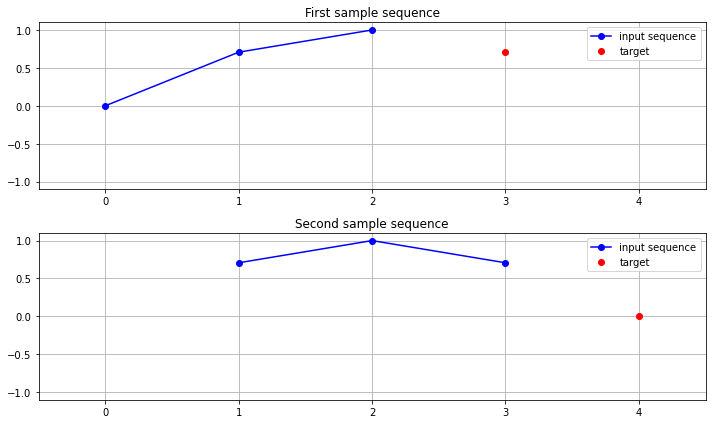

In [8]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

## RNN으로 해결 - SimpleRNN() 사용

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='sgd')

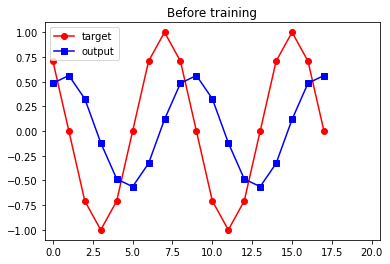

In [22]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [18]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 54us/step - loss: 9.1439e-04
Epoch 2/100
18/18 [==============================] - 0s 111us/step - loss: 8.8006e-04
Epoch 3/100
18/18 [==============================] - 0s 55us/step - loss: 8.4803e-04
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 8.1816e-04
Epoch 5/100
18/18 [==============================] - 0s 55us/step - loss: 7.9030e-04
Epoch 6/100
18/18 [==============================] - 0s 57us/step - loss: 7.6432e-04
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 7.4009e-04
Epoch 8/100
18/18 [==============================] - 0s 55us/step - loss: 7.1748e-04
Epoch 9/100
18/18 [==============================] - 0s 55us/step - loss: 6.9640e-04
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 6.7673e-04
Epoch 11/100
18/18 [==============================] - 0s 55us/step - loss: 6.5838e-04
Epoch 12/100
18/18 [==============================] - 0s 54us/

Epoch 97/100
18/18 [==============================] - 0s 111us/step - loss: 3.9137e-04
Epoch 98/100
18/18 [==============================] - 0s 111us/step - loss: 3.9110e-04
Epoch 99/100
18/18 [==============================] - 0s 55us/step - loss: 3.9084e-04
Epoch 100/100
18/18 [==============================] - 0s 111us/step - loss: 3.9057e-04


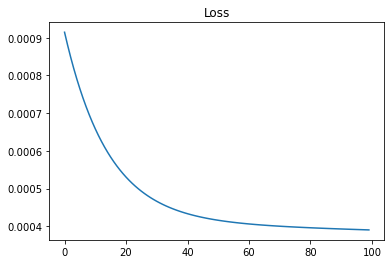

In [23]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

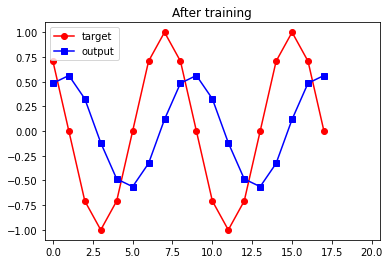

In [24]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [25]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_2/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.64041144, -0.6578175 , -0.53216374, -0.28078938, -0.65463126,
         0.19493407, -0.19907099,  0.01708084,  0.06939006, -0.6781267 ]],
      dtype=float32)>

In [26]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_2/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.36385044,  0.22335367, -0.52118134, -0.54113513, -0.11634786,
         0.26103228, -0.3629713 ,  0.18625121,  0.00758364, -0.07140672],
       [-0.12769385,  0.02112692,  0.5037151 , -0.3332082 ,  0.30710387,
         0.46061027, -0.06668831, -0.40750495, -0.37587532, -0.01506308],
       [ 0.36651963,  0.04184178,  0.20892961, -0.06846362, -0.49653322,
         0.18562913, -0.27958465,  0.18542244, -0.13656543,  0.6351151 ],
       [-0.5050381 , -0.04412505,  0.61502004, -0.03538448, -0.29056132,
        -0.1489067 , -0.1191911 ,  0.38816202,  0.21373008, -0.21524847],
       [ 0.26970324, -0.44003987, -0.06345795, -0.23105246, -0.53985953,
         0.06041905,  0.15722111, -0.10147577, -0.2603575 , -0.52755314],
       [ 0.03406008, -0.07282382,  0.04581036, -0.15245585, -0.12513323,
        -0.41184688, -0.4980536 , -0.63930607,  0.3546211 ,  0.01983117],
       [ 0.01543791,  0.5033566 , 

In [27]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [28]:
model2 = Sequential()
model2.add(SimpleRNN(5, input_shape=(3, 1)))
model2.add(Dense(1, activation="linear"))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.compile(loss='mse', optimizer='sgd')

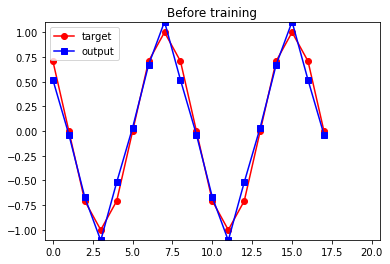

In [36]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [37]:
history = model2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 2/100
18/18 [==============================] - 0s 56us/step - loss: 0.0127
Epoch 3/100
18/18 [==============================] - 0s 55us/step - loss: 0.0123
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.0119
Epoch 5/100
18/18 [==============================] - 0s 55us/step - loss: 0.0116
Epoch 6/100
18/18 [==============================] - 0s 111us/step - loss: 0.0113
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 0.0110
Epoch 8/100
18/18 [==============================] - 0s 55us/step - loss: 0.0107
Epoch 9/100
18/18 [==============================] - 0s 55us/step - loss: 0.0105
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 0.0103
Epoch 11/100
18/18 [==============================] - 0s 111us/step - loss: 0.0101
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.0099
Epoch 13/100
18/18 [====

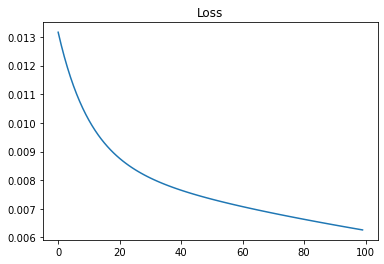

In [38]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

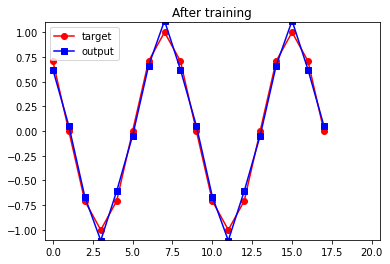

In [40]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [41]:
# 입력에 대한 weights
model2.weights[0]

<tf.Variable 'simple_rnn_3/kernel:0' shape=(1, 5) dtype=float32, numpy=
array([[ 0.52925456, -0.6781088 , -0.5050949 , -0.07007933,  0.9019237 ]],
      dtype=float32)>

In [42]:
# 유닛에 대한 weights
model2.weights[1]

<tf.Variable 'simple_rnn_3/recurrent_kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.32510158,  0.5475655 , -0.5546064 , -0.23099947,  0.4610208 ],
       [ 0.47577965, -0.4620909 , -0.65390754,  0.29363063,  0.24690834],
       [-0.25463647, -0.15924759, -0.5012616 , -0.326656  , -0.73900384],
       [-0.6914634 , -0.6308654 ,  0.0663123 , -0.0363005 ,  0.3505599 ],
       [ 0.3610415 , -0.2379976 ,  0.14288874, -0.8516224 ,  0.21440132]],
      dtype=float32)>

In [43]:
# bias
model2.weights[2]

<tf.Variable 'simple_rnn_3/bias:0' shape=(5,) dtype=float32, numpy=
array([-0.00155603, -0.00117413,  0.00200329,  0.00213841, -0.00520118],
      dtype=float32)>

In [44]:
model3 = Sequential()
model3.add(SimpleRNN(20, input_shape=(3, 1)))
model3.add(Dense(1, activation="linear"))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [45]:
model3.compile(loss='mse', optimizer='sgd')

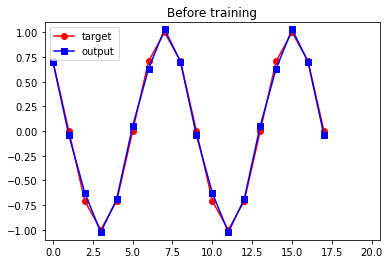

In [62]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [47]:
history = model3.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7834
Epoch 2/100
18/18 [==============================] - 0s 55us/step - loss: 0.7207
Epoch 3/100
18/18 [==============================] - 0s 55us/step - loss: 0.6634
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.6109
Epoch 5/100
18/18 [==============================] - 0s 0us/step - loss: 0.5628
Epoch 6/100
18/18 [==============================] - 0s 56us/step - loss: 0.5187
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 0.4781
Epoch 8/100
18/18 [==============================] - 0s 55us/step - loss: 0.4407
Epoch 9/100
18/18 [==============================] - 0s 55us/step - loss: 0.4063
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 0.3746
Epoch 11/100
18/18 [==============================] - 0s 55us/step - loss: 0.3454
Epoch 12/100
18/18 [==============================] - 0s 111us/step - loss: 0.3184
Epoch 13/100
18/18 [======

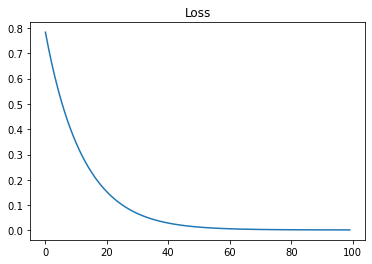

In [48]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

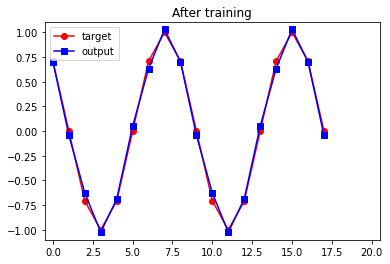

In [63]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [64]:
# 입력에 대한 weights
model3.weights[0]

<tf.Variable 'simple_rnn_4/kernel:0' shape=(1, 20) dtype=float32, numpy=
array([[ 0.25014213,  0.13126792,  0.39070615,  0.24141732,  0.4747151 ,
         0.5464535 ,  0.48163518, -0.6056095 , -0.41915277, -0.5870342 ,
         0.17717265, -0.0158718 ,  0.35075018,  0.00827294, -0.08541509,
        -0.10454543,  0.18397288,  0.38347483,  0.2818328 ,  0.38708922]],
      dtype=float32)>

In [65]:
# 유닛에 대한 weights
model3.weights[1]

<tf.Variable 'simple_rnn_4/recurrent_kernel:0' shape=(20, 20) dtype=float32, numpy=
array([[-6.29542053e-01,  3.83379519e-01, -1.16334461e-01,
        -2.94232041e-01, -2.44646460e-01,  2.40009964e-01,
         6.12674356e-02, -2.32549995e-01, -2.75562137e-01,
         7.32181966e-02, -1.00951061e-01, -1.82392225e-02,
         1.30574200e-02, -2.73648798e-02,  2.02947445e-02,
         2.04194784e-01,  7.22269341e-02, -2.69066453e-01,
        -2.55967025e-02,  1.74110457e-01],
       [-1.48064112e-02,  1.02213314e-02,  1.52528696e-02,
        -1.53202340e-01, -4.93873417e-01, -8.37486908e-02,
        -8.88490379e-02,  2.77733743e-01,  2.62147456e-01,
         1.00991286e-01, -1.49558440e-01,  5.55078033e-03,
         2.43700705e-02,  2.17333242e-01, -1.56571165e-01,
        -3.73807661e-02,  1.27917111e-01, -3.30338538e-01,
         1.23143584e-01, -5.74387610e-01],
       [ 1.26421541e-01,  1.25273481e-01, -9.75435823e-02,
         1.94570735e-01,  1.47973642e-01,  3.75775397e-01,
    

In [66]:
# bias
model3.weights[2]

<tf.Variable 'simple_rnn_4/bias:0' shape=(20,) dtype=float32, numpy=
array([-0.00065976,  0.00107024,  0.00053327, -0.00025487,  0.00148013,
       -0.00184126, -0.00048829,  0.00220167,  0.00036453,  0.00449295,
        0.00183774,  0.00188561, -0.00114642, -0.00031257, -0.00042521,
        0.00190923, -0.00282712, -0.00103576, -0.0027568 ,  0.00045082],
      dtype=float32)>

In [53]:
model4 = Sequential()
model4.add(SimpleRNN(60, input_shape=(3, 1)))
model4.add(Dense(1, activation="linear"))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 60)                3720      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [54]:
model4.compile(loss='mse', optimizer='sgd')

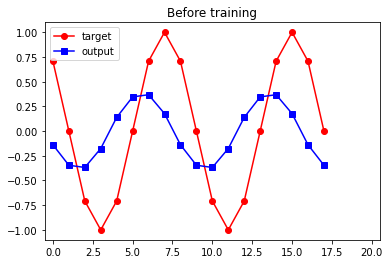

In [55]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model4.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [56]:
history = model4.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4082
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 0.3666
Epoch 3/100
18/18 [==============================] - 0s 425us/step - loss: 0.3297
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.2969
Epoch 5/100
18/18 [==============================] - 0s 0us/step - loss: 0.2675
Epoch 6/100
18/18 [==============================] - 0s 0us/step - loss: 0.2413
Epoch 7/100
18/18 [==============================] - 0s 0us/step - loss: 0.2176
Epoch 8/100
18/18 [==============================] - 0s 0us/step - loss: 0.1964
Epoch 9/100
18/18 [==============================] - 0s 0us/step - loss: 0.1772
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 0.1599
Epoch 11/100
18/18 [==============================] - 0s 56us/step - loss: 0.1442
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.1301
Epoch 13/100
18/18 [===========

Epoch 99/100
18/18 [==============================] - 0s 55us/step - loss: 1.0995e-04
Epoch 100/100
18/18 [==============================] - 0s 55us/step - loss: 1.0920e-04


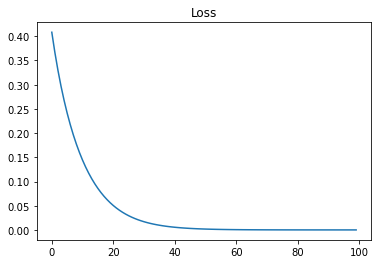

In [57]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

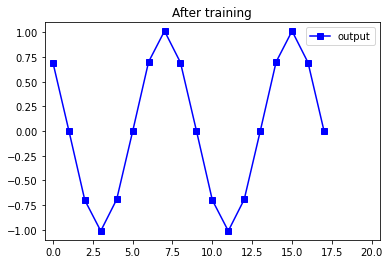

In [58]:
plt.plot(model4.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [59]:
# 입력에 대한 weights
model4.weights[0]

<tf.Variable 'simple_rnn_5/kernel:0' shape=(1, 60) dtype=float32, numpy=
array([[-0.20192136,  0.29707778, -0.28665876, -0.34729615,  0.0483736 ,
        -0.27480727,  0.24130249,  0.27461466, -0.24561378,  0.24229437,
         0.13743363, -0.24080786, -0.0663695 , -0.12042283,  0.1937168 ,
        -0.17353617, -0.2193964 , -0.29603705,  0.04115194,  0.3225134 ,
         0.11905411, -0.27925247,  0.01032867, -0.10214503, -0.11784104,
        -0.25030628, -0.24339697,  0.10310519,  0.09892973,  0.00658643,
        -0.1759776 ,  0.07001791,  0.09872646, -0.27948475,  0.29966158,
        -0.0720771 , -0.05783161, -0.03096169, -0.12985633, -0.1354946 ,
        -0.19979392,  0.12355161, -0.12308574,  0.07422663, -0.3302587 ,
        -0.01971887,  0.14433032,  0.29269272, -0.14156406, -0.06038381,
        -0.04221217,  0.17832525, -0.02142984,  0.32877043,  0.11978446,
        -0.0519685 ,  0.09893221, -0.06429385, -0.04645309,  0.10459486]],
      dtype=float32)>

In [60]:
# 유닛에 대한 weights
model4.weights[1]

<tf.Variable 'simple_rnn_5/recurrent_kernel:0' shape=(60, 60) dtype=float32, numpy=
array([[ 0.12847458,  0.16329068,  0.01143857, ...,  0.08421579,
        -0.08146995, -0.19190533],
       [ 0.08449564,  0.03721984, -0.10092879, ..., -0.0049866 ,
         0.23941156, -0.11834115],
       [ 0.00270363,  0.1633254 , -0.13242365, ...,  0.24548095,
         0.03972139, -0.07814275],
       ...,
       [-0.21725397,  0.08556413,  0.06616105, ..., -0.12317029,
         0.22095679, -0.01680822],
       [ 0.29529607,  0.05422763, -0.04567132, ..., -0.13480182,
         0.17243181, -0.06035825],
       [-0.12994504, -0.19793282, -0.10817005, ..., -0.1523688 ,
        -0.03197218, -0.13820314]], dtype=float32)>

In [61]:
# bias
model4.weights[2]

<tf.Variable 'simple_rnn_5/bias:0' shape=(60,) dtype=float32, numpy=
array([ 1.2756097e-04, -3.2922646e-04,  3.6755286e-04,  4.9937726e-04,
       -5.6150955e-05,  3.2066778e-04, -7.8853621e-04,  5.4275012e-04,
        6.1615329e-04, -4.6893614e-04, -8.4275700e-05,  1.7371235e-04,
       -8.2606377e-05, -1.6301802e-04,  4.5381655e-04,  5.8606017e-04,
        1.4616270e-04,  5.7049864e-04, -5.7689619e-04, -1.0204936e-04,
        3.2603569e-04,  3.4444904e-04, -6.8678046e-06, -1.7057777e-04,
       -4.0197698e-04,  4.9942464e-04,  2.4409458e-04,  1.0702521e-04,
       -7.5032818e-05, -3.6305282e-04,  3.1955569e-04,  4.6384634e-04,
        1.8525413e-04,  3.9814509e-05,  3.0938548e-04, -6.9747912e-04,
        9.1497228e-04,  4.4673731e-04,  5.7691748e-05, -4.4557310e-04,
        3.3069347e-04, -1.0253221e-04,  4.6667574e-06, -3.2263415e-04,
       -1.0312105e-04,  9.9665056e-05,  5.6919619e-04, -1.1379047e-04,
        3.4937816e-04,  1.4430293e-04,  4.5661253e-04,  4.9893442e-04,
       -